## Prognostics and Health Management (PHM)

In [1]:
import pandas as pd
import numpy as np

index_columns_names =  ["UnitNumber","Cycle"]
operational_settings_columns_names = ["OpSet"+str(i) for i in range(1,4)]
sensor_measure_columns_names =["SensorMeasure"+str(i) for i in range(1,22)]
input_file_column_names = index_columns_names + operational_settings_columns_names + sensor_measure_columns_names

train=pd.read_csv('train.txt',delim_whitespace=True,names=input_file_column_names)
train.head()

,UnitNumber,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21
0,1,1,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,...,372.15,2388.13,8120.83,8.6216,0.03,368,2319,100.0,28.58,17.1735
1,1,2,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,...,521.81,2388.15,8132.87,8.3907,0.03,391,2388,100.0,38.99,23.3619
2,1,3,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,...,183.26,2387.95,8063.84,9.3557,0.02,334,2223,100.0,14.83,8.8555
3,1,4,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,...,314.84,2388.07,8052.30,9.2231,0.02,364,2324,100.0,24.42,14.7832
4,1,5,42.0041,0.8405,40.0,445.00,549.52,1354.48,1124.32,3.91,...,130.44,2387.89,8083.67,9.2986,0.02,330,2212,100.0,10.99,6.4025


### RUL Calculation

In [2]:
rul_unitno=[max(train.query('UnitNumber=='+str(i)).Cycle) for i in range(1,219)]
temp=[rul_unitno[i-1]-train.query('UnitNumber=='+str(i)).Cycle.values for i in range(1,219)]
t_minus_list=[j for i in temp for j in i]
t_minus_list=t_minus_list[0:223]
t_minus_list

[222,
 221,
 220,
 219,
 218,
 217,
 216,
 215,
 214,
 213,
 212,
 211,
 210,
 209,
 208,
 207,
 206,
 205,
 204,
 203,
 202,
 201,
 200,
 199,
 198,
 197,
 196,
 195,
 194,
 193,
 192,
 191,
 190,
 189,
 188,
 187,
 186,
 185,
 184,
 183,
 182,
 181,
 180,
 179,
 178,
 177,
 176,
 175,
 174,
 173,
 172,
 171,
 170,
 169,
 168,
 167,
 166,
 165,
 164,
 163,
 162,
 161,
 160,
 159,
 158,
 157,
 156,
 155,
 154,
 153,
 152,
 151,
 150,
 149,
 148,
 147,
 146,
 145,
 144,
 143,
 142,
 141,
 140,
 139,
 138,
 137,
 136,
 135,
 134,
 133,
 132,
 131,
 130,
 129,
 128,
 127,
 126,
 125,
 124,
 123,
 122,
 121,
 120,
 119,
 118,
 117,
 116,
 115,
 114,
 113,
 112,
 111,
 110,
 109,
 108,
 107,
 106,
 105,
 104,
 103,
 102,
 101,
 100,
 99,
 98,
 97,
 96,
 95,
 94,
 93,
 92,
 91,
 90,
 89,
 88,
 87,
 86,
 85,
 84,
 83,
 82,
 81,
 80,
 79,
 78,
 77,
 76,
 75,
 74,
 73,
 72,
 71,
 70,
 69,
 68,
 67,
 66,
 65,
 64,
 63,
 62,
 61,
 60,
 59,
 58,
 57,
 56,
 55,
 54,
 53,
 52,
 51,
 50,
 49,
 48,
 4

### Variation Analysis

In [3]:
train_engine1=train.head(223)
for i in range(5,len(input_file_column_names)):
    std=train_engine1.iloc[:,i].std(ddof=1)
    mean=train_engine1.iloc[:,i].mean()
    print(input_file_column_names[i],std/mean)

SensorMeasure1 0.053822044790703905
SensorMeasure2 0.0638750472125966
SensorMeasure3 0.07566574898216206
SensorMeasure4 0.09949157194636571
SensorMeasure5 0.4473415968604807
SensorMeasure6 0.4696487811891109
SensorMeasure7 0.5281573370034631
SensorMeasure8 0.07150062843370067
SensorMeasure9 0.040031688062864744
SensorMeasure10 0.117559461804708
SensorMeasure11 0.08016627255406787
SensorMeasure12 0.5291416815397663
SensorMeasure13 0.06251761677191522
SensorMeasure14 0.011445721981227792
SensorMeasure15 0.08579184891255891
SensorMeasure16 0.20018573675610346
SensorMeasure17 0.0810751796443112
SensorMeasure18 0.07154464813227147
SensorMeasure19 0.06251908374124861
SensorMeasure20 0.4815857125946838
SensorMeasure21 0.4814384064514891


### Feature Engineering for Moving Average/Variance/Peak

In [4]:
window=10
moving_average=[]
moving_variance=[]
moving_peak=[]

for sensor in range(1,22):
    sensorname="SensorMeasure"+str(sensor)
    for i in range(223-window+1):
        moving_average.append(train_engine1[sensorname][i:i+window].mean())
        moving_variance.append(train_engine1[sensorname][i:i+window].var(ddof=1))
        moving_peak.append(train_engine1[sensorname][i:i+window].max())


sensor_measure_columns_names =["SensorMeasure_MA"+str(i) for i in range(1,22)]
moving_average_data=pd.DataFrame(columns=sensor_measure_columns_names,index=list(range(223-window+1)))
sensor_measure_columns_names =["SensorMeasure_MV"+str(i) for i in range(1,22)]
moving_variance_data=pd.DataFrame(columns=sensor_measure_columns_names,index=list(range(223-window+1)))
sensor_measure_columns_names =["SensorMeasure_MP"+str(i) for i in range(1,22)]
moving_peak_data=pd.DataFrame(columns=sensor_measure_columns_names,index=list(range(223-window+1)))


for sensor in range(1,22):
    sensorname="SensorMeasure_MA"+str(sensor)
    for i in range(223-window+1):
        moving_average_data[sensorname][i]=moving_average[(sensor-1)*(223-window+1)+i]

for sensor in range(1,22):
    sensorname="SensorMeasure_MV"+str(sensor)
    for i in range(223-window+1):
        moving_variance_data[sensorname][i]=moving_variance[(sensor-1)*(223-window+1)+i]

for sensor in range(1,22):
    sensorname="SensorMeasure_MP"+str(sensor)
    for i in range(223-window+1):
        moving_peak_data[sensorname][i]=moving_peak[(sensor-1)*(223-window+1)+i]

In [5]:
### moving RUL
moving_rul_data=pd.DataFrame(columns=["RUL"],index=list(range(223-window+1)))
for i in range(223-window+1):
    moving_rul_data["RUL"][i]=sum(t_minus_list[i:i+window])/window

In [6]:
### Feature Selection 1
moving_data=pd.concat([moving_average_data,moving_variance_data],axis=1)
moving_data=pd.concat([moving_data,moving_peak_data],axis=1)
moving_data=pd.concat([moving_data,moving_rul_data],axis=1)
moving_data=moving_data.astype('float') 
cor_mat=moving_data.corr()
cor_mat=cor_mat.abs()
print(cor_mat['RUL'].sort_values(ascending=False).head(11))

RUL                   1.000000
SensorMeasure_MP13    0.842760
SensorMeasure_MV3     0.299610
SensorMeasure_MV10    0.296584
SensorMeasure_MV17    0.294907
SensorMeasure_MV9     0.292441
SensorMeasure_MV4     0.290402
SensorMeasure_MV21    0.287412
SensorMeasure_MV7     0.286176
SensorMeasure_MV20    0.285807
SensorMeasure_MV12    0.285569
Name: RUL, dtype: float64


In [7]:
### Feature Selection 2
from sklearn.ensemble import RandomForestRegressor
forest_model=RandomForestRegressor()

X=moving_data.drop(['RUL'],axis=1)
y=moving_data['RUL']
forest_model.fit(X,y)
importances=forest_model.feature_importances_

sort_index=np.argsort(-importances)
sort_importances=X.columns[sort_index[0:10]]

for i in range(10):
    print(sort_importances[i],importances[sort_index[i]])


SensorMeasure_MP13 0.7089002424033145
SensorMeasure_MP12 0.10805959716047396
SensorMeasure_MP15 0.07120330556413042
SensorMeasure_MP21 0.027429111689719104
SensorMeasure_MP11 0.015134446575956573
SensorMeasure_MP14 0.010666646442043591
SensorMeasure_MP7 0.0092461045710866
SensorMeasure_MP8 0.005391973216233194
SensorMeasure_MP4 0.0042772238507104475
SensorMeasure_MA5 0.0038058870283932842


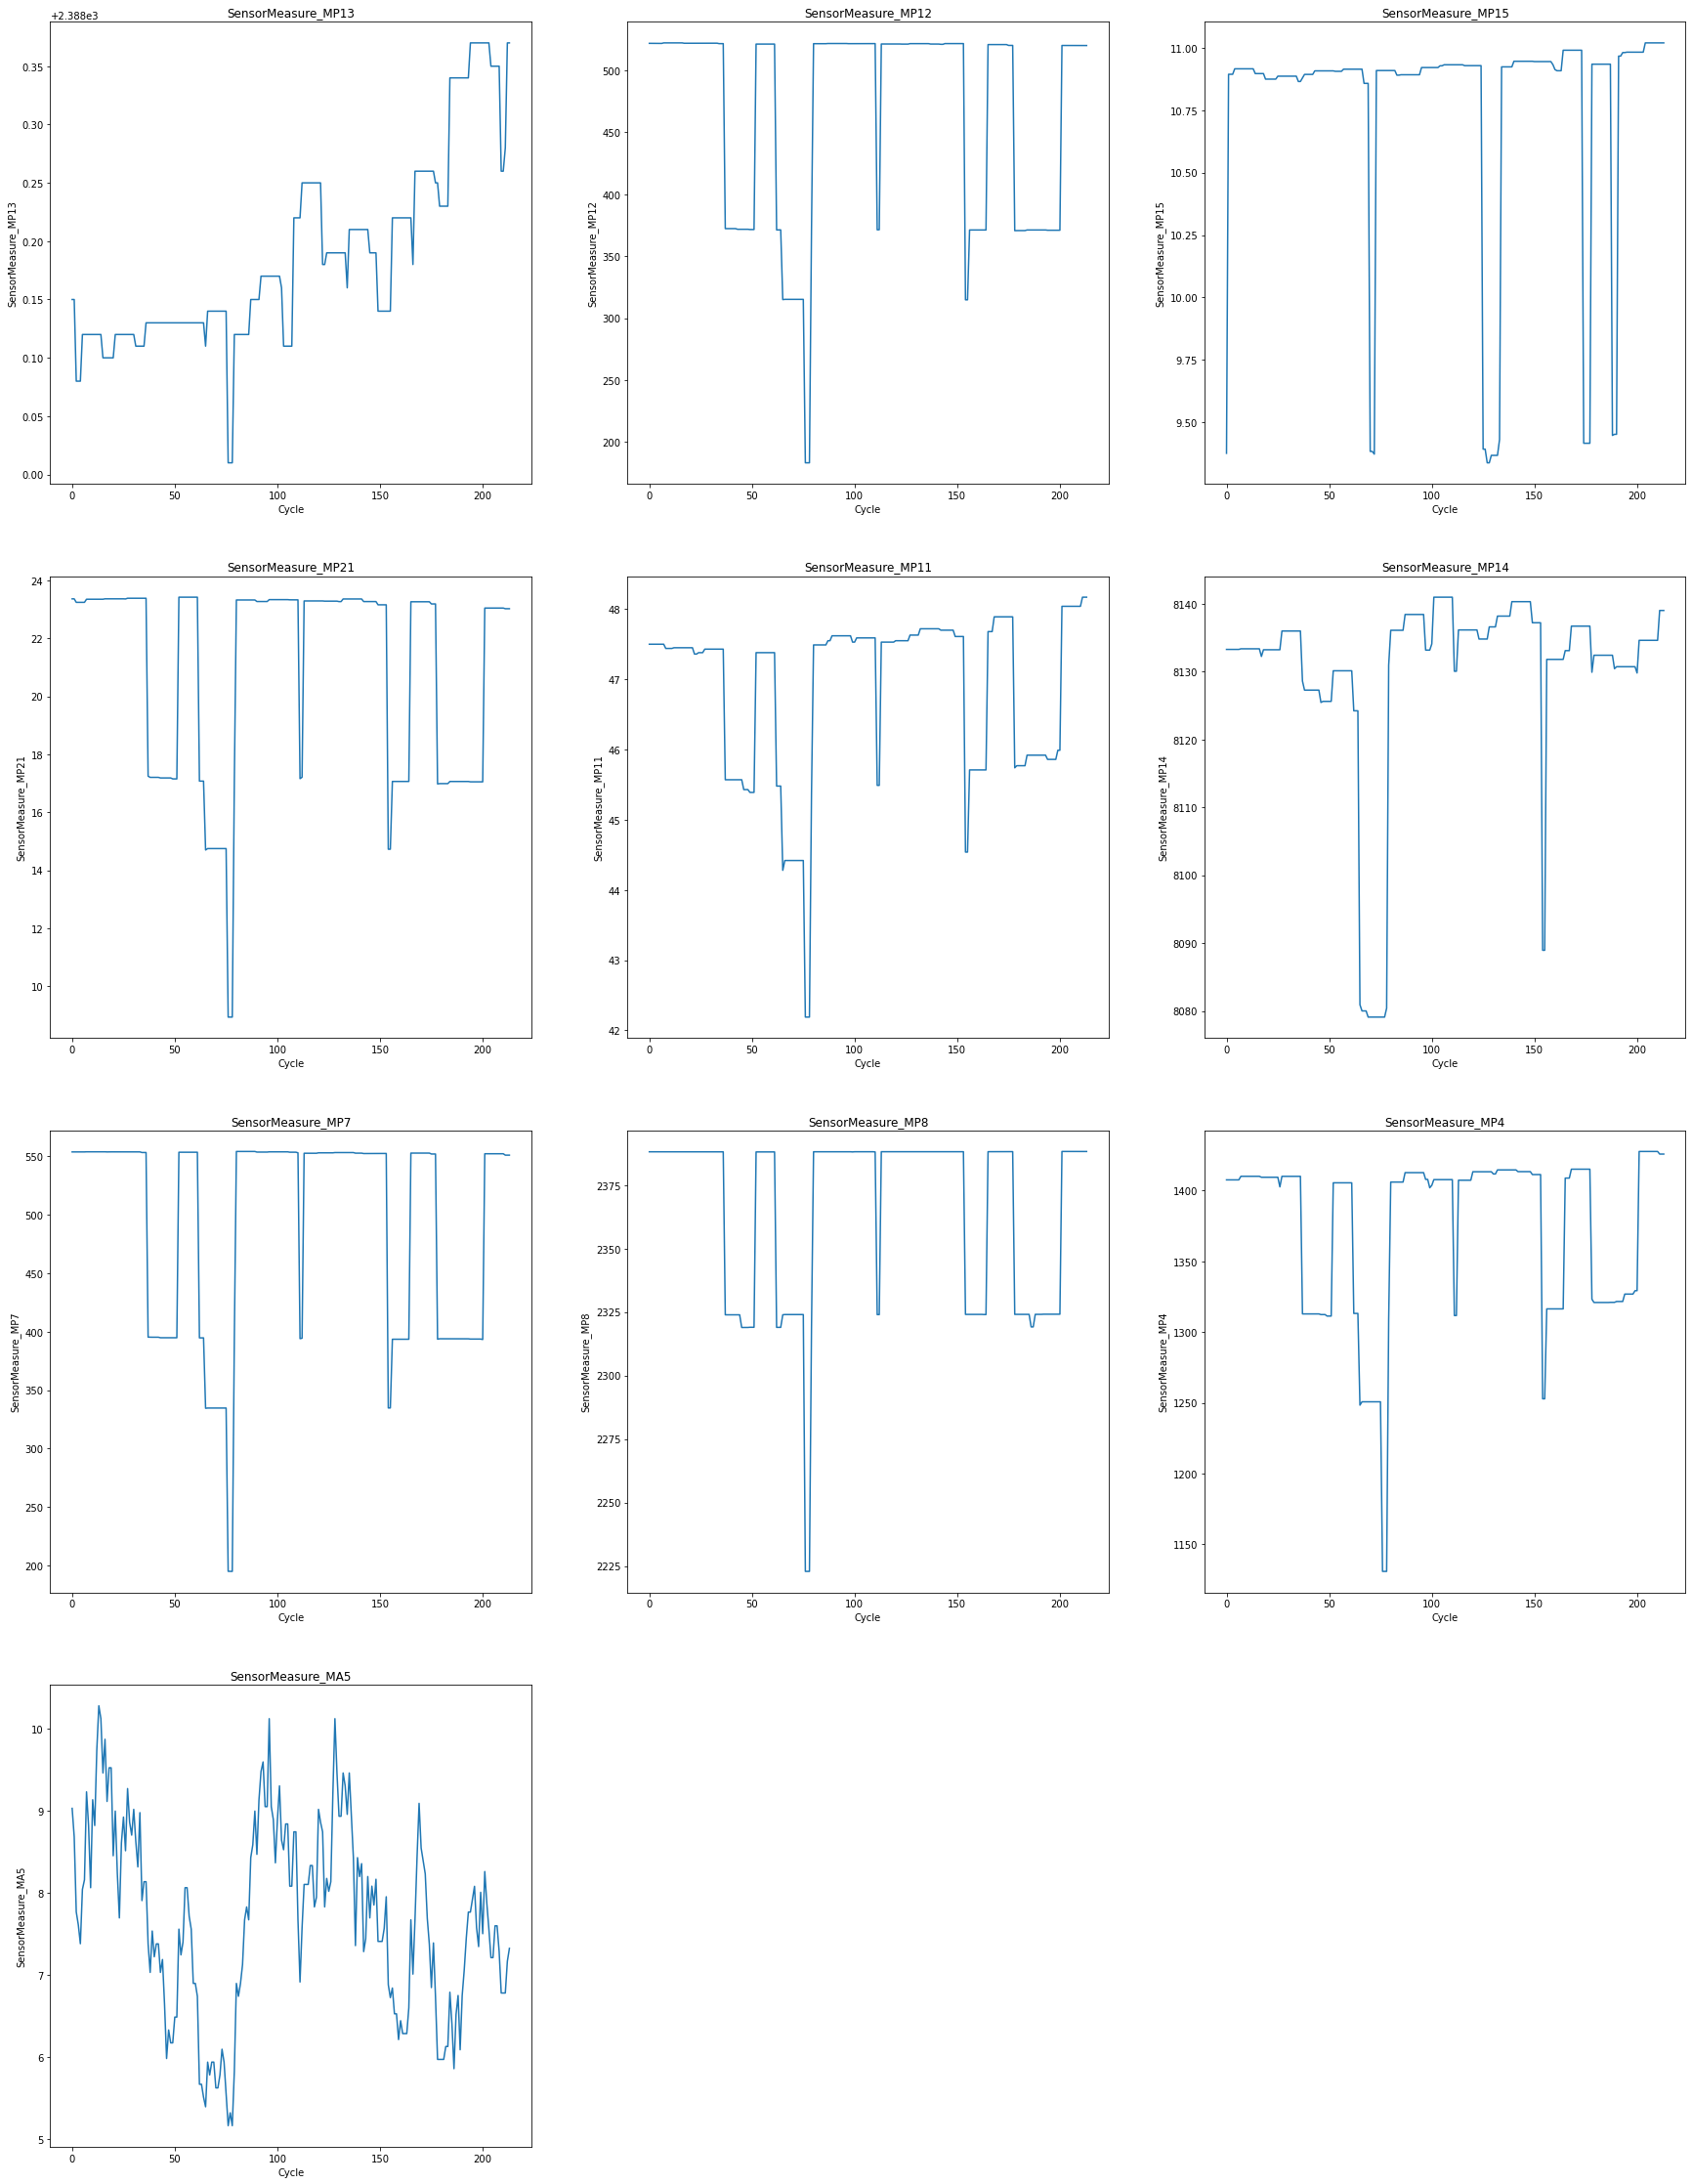

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(30,40))

for i in range(1,11):
    plt.subplot(4,3,i)
    plt.plot(moving_data[sort_importances[i-1]].values)
    plt.title(sort_importances[i-1])
    plt.xlabel("Cycle")
    plt.ylabel(sort_importances[i-1])
    
plt.show()
